
Iteraciones del Método de Bisección:
Iter |       a       |       b       |       c       |      f(c)      |     Error Abs    |     Error Rel    |     Error Cuad    
-----------------------------------------------------------------------------------------------------------------------------
   1 | 0.00000000 | 1.00000000 | 0.50000000 | 0.10653066 | 5.00000000e-01 | 1.00000000e+00 | 2.50000000e-01
   2 | 0.50000000 | 1.00000000 | 0.75000000 | -0.27763345 | 2.50000000e-01 | 3.33333333e-01 | 6.25000000e-02
   3 | 0.50000000 | 0.75000000 | 0.62500000 | -0.08973857 | 1.25000000e-01 | 2.00000000e-01 | 1.56250000e-02
   4 | 0.50000000 | 0.62500000 | 0.56250000 | 0.00728282 | 6.25000000e-02 | 1.11111111e-01 | 3.90625000e-03
   5 | 0.56250000 | 0.62500000 | 0.59375000 | -0.04149755 | 3.12500000e-02 | 5.26315789e-02 | 9.76562500e-04
   6 | 0.56250000 | 0.59375000 | 0.57812500 | -0.01717584 | 1.56250000e-02 | 2.70270270e-02 | 2.44140625e-04
   7 | 0.56250000 | 0.57812500 | 0.57031250 | -0.004963

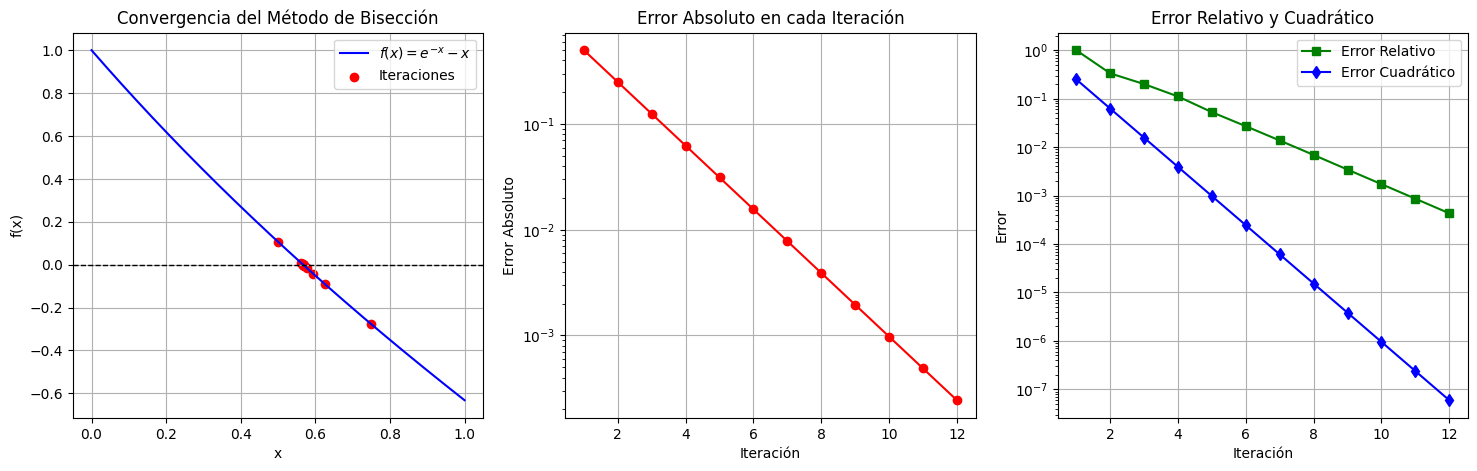

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función dada
def f(x):
    return np.exp(-x) - x

# Algoritmo del Método de Bisección
def biseccion(a, b, tol=1e-5, max_iter=100):
    if f(a) * f(b) >= 0:
        print("El método de bisección no es aplicable en el intervalo dado.")
        return None
    
    iteraciones = []
    errores_abs = []
    errores_rel = []
    errores_cuad = []
    c_old = a  # Para calcular errores

    print("\nIteraciones del Método de Bisección:")
    print("Iter |       a       |       b       |       c       |      f(c)      |     Error Abs    |     Error Rel    |     Error Cuad    ")
    print("-" * 125)

    for i in range(max_iter):
        c = (a + b) / 2
        iteraciones.append(c)
        
        error_abs = abs(c - c_old)
        error_rel = error_abs / abs(c) if c != 0 else 0
        error_cuad = error_abs**2
        
        errores_abs.append(error_abs)
        errores_rel.append(error_rel)
        errores_cuad.append(error_cuad)

        print(f"{i+1:4d} | {a:.8f} | {b:.8f} | {c:.8f} | {f(c):.8f} | {error_abs:.8e} | {error_rel:.8e} | {error_cuad:.8e}")

        if abs(f(c)) < tol or error_abs < tol:
            break

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        
        c_old = c

    return iteraciones, errores_abs, errores_rel, errores_cuad

# Parámetros iniciales
a, b = 0, 1
iteraciones, errores_abs, errores_rel, errores_cuad = biseccion(a, b)

# Crear la figura
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Gráfica de la función y la convergencia de iteraciones
x = np.linspace(a, b, 400)
y = f(x)

ax[0].plot(x, y, label=r'$f(x) = e^{-x} - x$', color='b')
ax[0].axhline(0, color='k', linestyle='--', linewidth=1)  # Línea en y=0
ax[0].scatter(iteraciones, [f(c) for c in iteraciones], color='red', label='Iteraciones')
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[0].set_title("Convergencia del Método de Bisección")
ax[0].legend()
ax[0].grid()

# Gráfica de convergencia del error absoluto
ax[1].plot(range(1, len(errores_abs)+1), errores_abs, marker='o', linestyle='-', color='r')
ax[1].set_yscale("log")  # Escala logarítmica
ax[1].set_xlabel("Iteración")
ax[1].set_ylabel("Error Absoluto")
ax[1].set_title("Error Absoluto en cada Iteración")
ax[1].grid()

# Gráfica de convergencia del error relativo y cuadrático
ax[2].plot(range(1, len(errores_rel)+1), errores_rel, marker='s', linestyle='-', color='g', label='Error Relativo')
ax[2].plot(range(1, len(errores_cuad)+1), errores_cuad, marker='d', linestyle='-', color='b', label='Error Cuadrático')
ax[2].set_yscale("log")  # Escala logarítmica
ax[2].set_xlabel("Iteración")
ax[2].set_ylabel("Error")
ax[2].set_title("Error Relativo y Cuadrático")
ax[2].legend()
ax[2].grid()

# Mostrar la figura
title = "biseccion_convergencia1.png"
plt.savefig(title, dpi=300)
plt.show()

